In [7]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayushmishra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
df = pd.read_csv("tweets.csv", encoding='latin-1', header=None)


In [9]:
df.columns = ['target', 'id', 'date', 'query', 'user', 'text']

In [10]:

# 3. Preview the Data
df = df[['text']]  # Keep only the text column for analysis
df.head()


,text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."


In [11]:
# Function to clean the tweet text
def preprocess_text(text):
    text = text.lower()                                      # Lowercase
    text = re.sub(r'http\S+|www.\S+', '', text)              # Remove URLs
    text = re.sub(r'@\w+', '', text)                         # Remove mentions
    text = re.sub(r'#\w+', '', text)                         # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)                      # Remove punctuation
    text = re.sub(r'\d+', '', text)                          # Remove numbers
    text = text.strip()                                      # Remove whitespace
    stop_words = set(stopwords.words('english'))            # Load stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Preview the cleaned data
df[['text', 'clean_text']].head()


,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


In [12]:
# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['sentiment'] = df['clean_text'].apply(get_sentiment)

# View sentiment distribution
df['sentiment'].value_counts()


sentiment
Positive    676246
Neutral     600522
Negative    323232
Name: count, dtype: int64

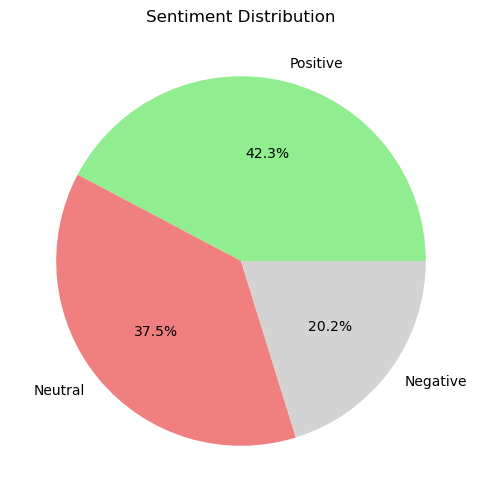

/var/folders/c9/0xfhcggs0ml6v_d0sytc5cw40000gn/T/ipykernel_38128/1893237737.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


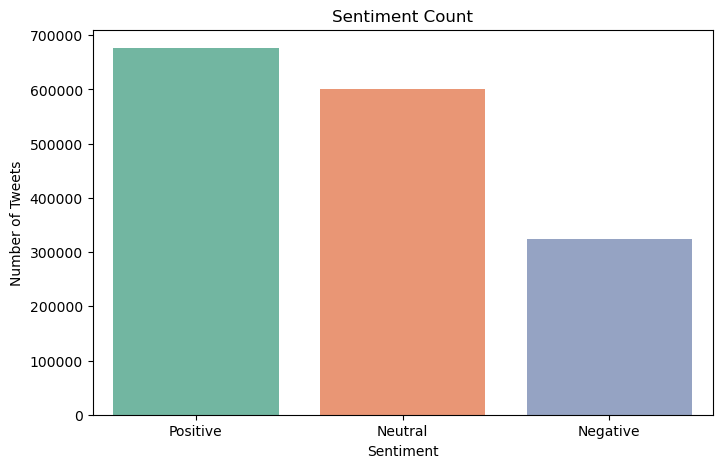

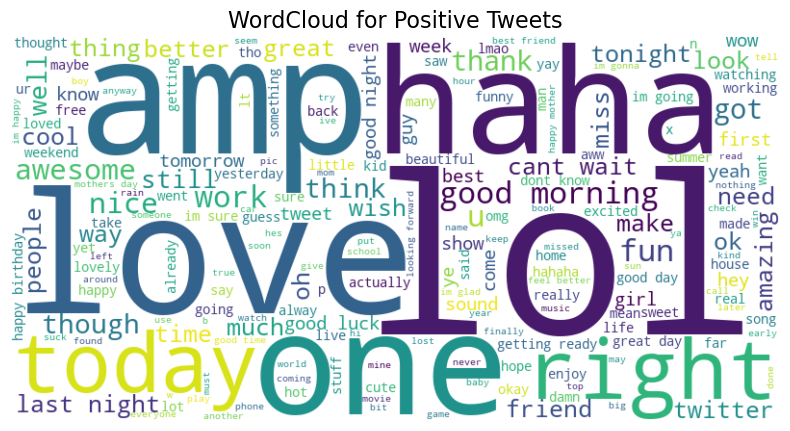

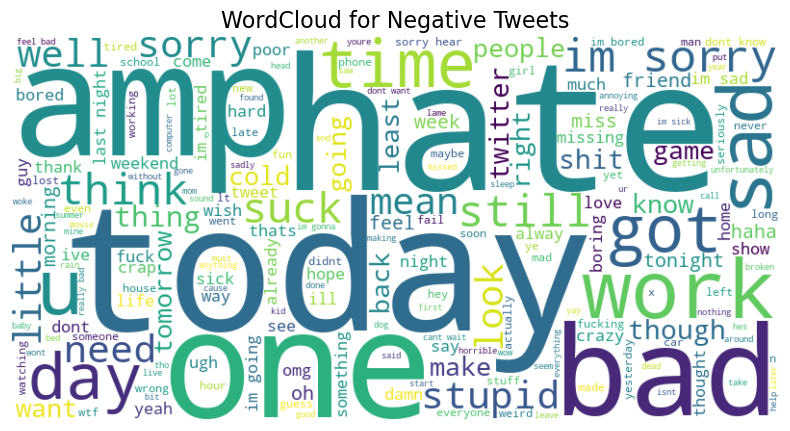

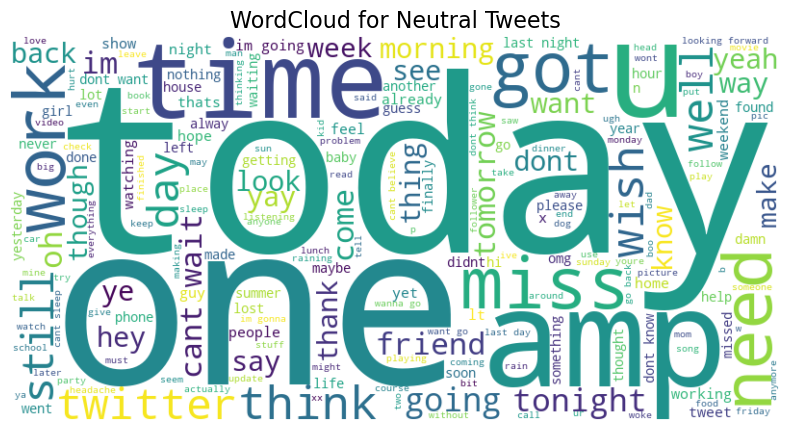

In [13]:
# Pie Chart for Sentiment Distribution
plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightgrey'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

# Bar Plot
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Sentiment Count')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

# WordCloud for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    subset = df[df['sentiment'] == sentiment]
    text = " ".join(subset['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'WordCloud for {sentiment} Tweets', fontsize=16)
    plt.show()


In [14]:
# Basic Insight Summary
total = len(df)
positive = df[df['sentiment'] == 'Positive'].shape[0]
negative = df[df['sentiment'] == 'Negative'].shape[0]
neutral = df[df['sentiment'] == 'Neutral'].shape[0]

print("Total Tweets Analyzed:", total)
print(f"Positive Tweets: {positive} ({positive/total:.2%})")
print(f"Negative Tweets: {negative} ({negative/total:.2%})")
print(f"Neutral Tweets: {neutral} ({neutral/total:.2%})")


Total Tweets Analyzed: 1600000
Positive Tweets: 676246 (42.27%)
Negative Tweets: 323232 (20.20%)
Neutral Tweets: 600522 (37.53%)
